In [1]:
from typing import Union, Tuple, List
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Homework 10 - Nonlinear equations

## Part 1


#### Excercise 1
Try to find the solution to 
$$x=e^{1-x^2}$$
using the relaxation method, and *not inverting or changing* this form of the equation. You can stop the iterations based on the simple method of comparing $x$ and $x'$.

- What should the answer be analytically? 
- What is you numerical solution?
- What do you notice about the iteration solutions? 

In [2]:
# Program:
def relaxation(f: callable, initial_guess: float = 1, tolerace: float = 1e-30, max_iter: int = 5000) -> Union[float, None]:
    """
    Solve nonlinear equations using relaxation method
    :param f: function to be solved
    :param tolerace: the tolerance for the solution
    :param max_iter: maximum number of iterations
    :return: the solution
    """
    x = initial_guess
    for i in range(max_iter):
        x_new = f(x)
        if np.isclose(x_new, x, atol=tolerace):
            return x_new
        x = x_new
    return x

In [3]:
def f(x: float) -> float:
    """
    Function to be solved
    :param x: x value
    :return: f(x)
    """
    return np.exp(1 - x**2)

x = relaxation(f, initial_guess=0.99)
print(f"The relaxation method results in {x = }")
x = relaxation(f, initial_guess=1)
print(f"The relaxation method results in {x = }")
x = relaxation(f, initial_guess=1.01)
print(f"The relaxation method results in {x = }")

The relaxation method results in x = 0.0016799111166579221
The relaxation method results in x = 1.0
The relaxation method results in x = 2.7182741572030253


<font color="blue">Answer:</font> 
- Analytically, the answer should be x = 1, by inspection.
- Numerically, we don't get a solution unless we provide the guess to already be the solution!
    - Why? Because the solution to the equation $x = e^{1 - x^2}$ is unstable. Any deviation from the actual solution and the iterative method will cause the next iteration to be further away from the solution, not closer!
    - If initial guess is less than 1, iterations converge to 0, if initial guess is greater than 1, iterations converge to $e$

#### Excercise 2

Solve the equation in Excercise 1 for the other $x$ and try again. Show the analytical function, and solve it numericall. Start the iterations with $x=0.5$.

$$
x = e^{1 - x^2} \\[5pt]
\ln(x) = 1 - x^2 \\[5pt]
\sqrt{1 - \ln(x)} = x\\[5pt]
$$

<font color="blue">Answer:</font> 

In [4]:
# Program:
def f(x: float) -> float:
    """
    Function to be solved
    :param x: x value
    :return: f(x)
    """
    return np.sqrt(1 - np.log(x))

x = relaxation(f, initial_guess=0.5)
print(f"The relaxation method results in {x = }")
x = relaxation(f, initial_guess=1)
print(f"The relaxation method results in {x = }")
x = relaxation(f, initial_guess=1.5)
print(f"The relaxation method results in {x = }")

The relaxation method results in x = 0.9999977765356085
The relaxation method results in x = 1.0
The relaxation method results in x = 1.0000018367939965


#### Excercise 3

The function 
$$x=x^2+\cos{4x}$$ 
cannot be strictly inverted, but you can re-arrange the equation.

Solve the equation for the $x$ inside the $\cos$ function and use the relaxation method to try to find a solution. 

How many solutions are there? How many can this rearrangement of the equation find?

This is not a true inversion, so there is no guarantee this will work.

<font color="blue">Answer:</font>

$$
x = x^2 + \cos(4x) \\[5pt]
x - x^2 = \cos(4x) \\[5pt]
\frac{\arccos(x - x^2)}{4} = x\\[5pt]
$$

- There are a total of two solutions to the original equation, however in this "pseudo-inversion", we lose one of them, as can be seen in the plot.

<ipython-input-5-0b2f4e464faf>:16: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(x - x**2)/4


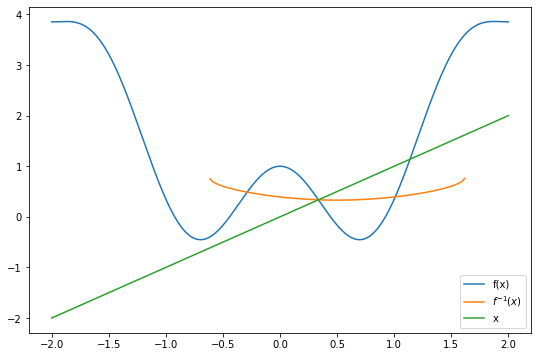

The relaxation method results in x = 0.3364146387163608
The relaxation method results in x = 0.3364146315631733


In [5]:
# Program:
def f(x: float) -> float:
    """
    Function to be solved
    :param x: x value
    :return: f(x)
    """
    return x**2 + np.cos(4*x)

def finv(x: float) -> float:
    """
    Function to be solved
    :param x: x value
    :return: f(x)
    """
    return np.arccos(x - x**2)/4

plt.figure(figsize=(9, 6))
x = np.linspace(-2, 2, 1000)
plt.plot(x, f(x), label="f(x)")
plt.plot(x, finv(x), label="$f^{-1}(x)$")
plt.plot(x, x, label="x")
plt.legend()
plt.show()

x = relaxation(finv, initial_guess=0)
print(f"The relaxation method results in {x = }")
x = relaxation(finv, initial_guess=1.5)
print(f"The relaxation method results in {x = }")

#### Excercise 4
Solve the equation
$$x=\sqrt{1-\log{x}}$$
stopping the iteration when the error estimation based on the derviative of $f(x)$ is less than $10^{-9}$. Start at $x=0.3$.

Error:
$$\epsilon'\approx\frac{x-x'}{1-1/f'(x)}$$

**Assume that you don't know the analytical form of derivative** $f'(x)$. Use `scipy.misc.derivative` with `dx=1e-5` where you would use $f'$ instead.

In [6]:
def relaxation_error(
    f: callable, 
    fp: callable = None, 
    initial_guess: float = 1, 
    tolerace: float = 1e-9, 
    max_iter: int = 5000
) -> Union[float, None]:
    """
    Solve nonlinear equations using relaxation method
    :param f: function to be solved
    :param tolerace: the tolerance for the solution
    :param max_iter: maximum number of iterations
    :return: the solution
    """
    x = initial_guess
    for i in range(max_iter):
        x_new = f(x)
        if fp is not None:
            dx = fp(x)
        else:
            dx = derivative(f, x, dx=1e-5)
        error = (x - x_new)/(1 - 1/dx)
        if abs(error) < tolerace:
            return x_new
        x = x_new
    return None

In [7]:
# Program:

def f(x: float) -> float:
    """
    Function to be solved
    :param x: x value
    :return: f(x)
    """
    return np.sqrt(1 - np.log(x))

x = relaxation_error(f, initial_guess=0.3)
print(f"The relaxation method results in {x = }")

The relaxation method results in x = 0.9999999991308792


#### Excercise 5

Write a program to solve the equation 
    $$x=1-e^{-cx}$$
by the relaxation method. Your only output should be a plot of the solution $x$ as a function of $c$ from $0.001\rightarrow3$ in steps of $0.001$. You should find a clear transition of the regime where the solution goes from zero to non-zero.

Use a target of $10^{-6}$ for the for estimation of the error in the solution, and use the first derivative to calculate it in the relaxation method loop. Use seperate functions for the right hand side $f(x)$ and its derivative $f'(x)$, in other words:

```python
def f(c,x) :
   return 1.0-numpy.exp(-c*x)
```     
and 
```python
def fp(c,x) :
    return ?
```     
The observed transisiton is known as the percolation transition.

In [8]:
def relaxation_error_c(
    f: callable, 
    fp: callable = None,
    c: float = float,
    initial_guess: float = 1, 
    tolerace: float = 1e-9, 
    max_iter: int = 5000
) -> Union[float, None]:
    """
    Solve nonlinear equations using relaxation method
    :param f: function to be solved
    :param tolerace: the tolerance for the solution
    :param max_iter: maximum number of iterations
    :return: the solution
    """
    x = initial_guess
    for i in range(max_iter):
        x_new = f(x, c)
        if fp is not None:
            dx = fp(x, c)
        else:
            dx = derivative(f, x, dx=1e-6)
        error = (x - x_new)/(1 - 1/dx)
        if abs(error) < tolerace:
            return x_new, i
        x = x_new
    return None, max_iter

def plot_relaxation_solution(
    f: callable, 
    range: Tuple[float, float, float],
    fp: callable = None,
    initial_guess: float = 1,
    tolerace: float = 1e-9, 
    max_iter: int = 5000,
) -> None:
    c = np.arange(*range)
    x = []
    y = []
    for i in c:
        solution, iterations = relaxation_error_c(f=f, fp=fp, c=i, initial_guess=initial_guess, tolerace=tolerace, max_iter=max_iter)
        x.append(solution)
        y.append(iterations)
    x = np.array(x)
    y = np.array(y)
    
    plt.figure(figsize=(9, 6))
    plt.title(f"Solution Using Relaxation Method for {f.__name__}")
    plt.xlabel("c")
    plt.ylabel("x")
    plt.plot(c, x, label="Solution to $x = f(x)$")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.figure(figsize=(9, 6))
    plt.title("Iteractions to Solve $x = f(x)$ Using Relaxation Method")
    plt.xlabel("c")
    plt.ylabel("Log(iterations)")
    plt.plot(c, y, label="Iterations to solve $x = f(x)$")
    plt.yscale("log")
    plt.legend()
    plt.show()
    plt.close()

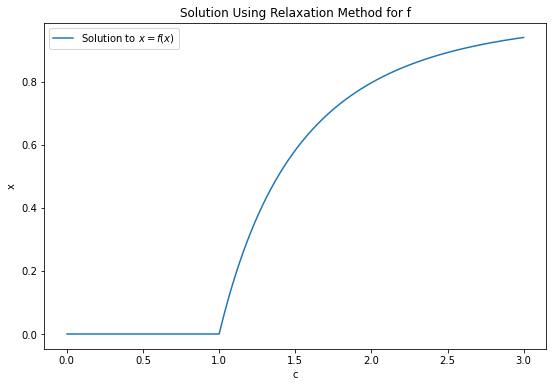

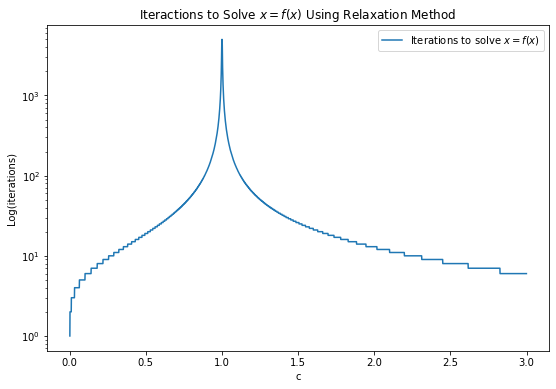

In [9]:
# Program:

def f(x: float, c: float) -> float:
    """
    Function to be solved
    :param x: x value
    :return: f(x)
    """
    return 1 - np.exp(-c*x)

def fp(x: float, c: float) -> float:
    """
    Function to be solved
    :param x: x value
    :return: f(x)
    """
    return c*np.exp(-c*x)

plot_relaxation_solution(f=f, range=(0.001, 3, 0.001), fp=fp, initial_guess=1, tolerace=1e-6, max_iter=5000)


####  Excercise 6 (Bonus 5 points)

Change your program from Excercise 5 to plot out **the number of interations it took** to converge to a solution as a function of $c$ using normal relaxation. Use log scale on the yaxis becuase it will take a large number of iterations for $c\sim1$

Write a second program to utilize overrrelaxation, using $\alpha=0.5$.

$$x'=(1-\alpha)f(x)-\alpha x$$

$$\epsilon' \approx \frac{x-x'}{1-1/\left[(1+\alpha)f'(x)-\alpha\right]}$$

In [10]:
def over_relaxation_error_c(
    alpha: float,
    f: callable, 
    fp: callable = None,
    c: float = float,
    initial_guess: float = 1, 
    tolerace: float = 1e-9, 
    max_iter: int = 5000
) -> Union[float, None]:
    """
    Solve nonlinear equations using over relaxation method
    :param f: function to be solved
    :param tolerace: the tolerance for the solution
    :param max_iter: maximum number of iterations
    :return: the solution
    """
    x = initial_guess
    for i in range(max_iter):
        x_new = (1 - alpha) * f(x, c) - alpha * x
        if fp is not None:
            dx = fp(x, c)
        else:
            dx = derivative(f, x, dx=1e-6)
        error = (x - x_new)/(1 - (1 / ((1 + alpha) * dx - alpha)))
        if abs(error) < tolerace:
            return x_new, i
        x = x_new
    return None, max_iter

def plot_over_relaxation_solution(
    alpha: float,
    f: callable, 
    range: Tuple[float, float, float],
    fp: callable = None,
    initial_guess: float = 1,
    tolerace: float = 1e-9, 
    max_iter: int = 5000,
) -> None:
    c = np.arange(*range)
    x = []
    y = []
    for i in c:
        solution, iterations = over_relaxation_error_c(
            alpha=0.5, 
            f=f, 
            fp=fp, 
            c=i, 
            initial_guess=initial_guess, 
            tolerace=tolerace, 
            max_iter=max_iter
        )
        x.append(solution)
        y.append(iterations)
    x = np.array(x)
    y = np.array(y)
    
    plt.figure(figsize=(9, 6))
    plt.title(f"Solution Using Over Relaxation Method for {f.__name__}")
    plt.xlabel("c")
    plt.ylabel("x")
    plt.plot(c, x, label="Solution to $x = f(x)$")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.figure(figsize=(9, 6))
    plt.title("Iteractions to Solve $x = f(x)$ Using Over Relaxation Method")
    plt.xlabel("c")
    plt.ylabel("Log(iterations)")
    plt.plot(c, y, label="Iterations to solve $x = f(x)$")
    plt.yscale("log")
    plt.legend()
    plt.show()
    plt.close()

<ipython-input-10-e325d7c89280>:24: RuntimeWarning: divide by zero encountered in double_scalars
  error = (x - x_new)/(1 - (1 / ((1 + alpha) * dx - alpha)))
<ipython-input-10-e325d7c89280>:24: RuntimeWarning: invalid value encountered in double_scalars
  error = (x - x_new)/(1 - (1 / ((1 + alpha) * dx - alpha)))


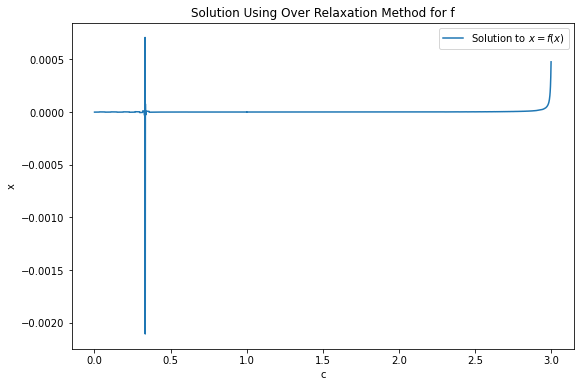

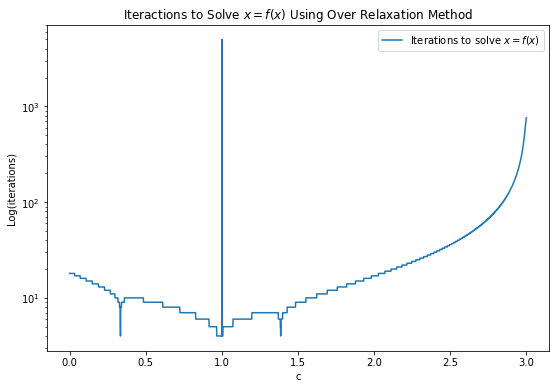

In [11]:
# Program:

def f(x: float, c: float) -> float:
    """
    Function to be solved
    :param x: x value
    :return: f(x)
    """
    return 1 - np.exp(-c*x)

def fp(x: float, c: float) -> float:
    """
    Function to be solved
    :param x: x value
    :return: f(x)
    """
    return c*np.exp(-c*x)

plot_over_relaxation_solution(alpha=0, f=f, range=(0.001, 3, 0.001), fp=fp, initial_guess=0.5, tolerace=1e-6, max_iter=5000)
